In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df = pd.read_csv('../Dataset/Prostate_Cancer.csv')
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [165]:
df.diagnosis_result

0     M
1     B
2     M
3     M
4     M
     ..
95    M
96    B
97    B
98    B
99    M
Name: diagnosis_result, Length: 100, dtype: object

In [166]:
df.shape

(100, 10)

In [167]:
df.dtypes

id                     int64
diagnosis_result      object
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [168]:
df.diagnosis_result = df.diagnosis_result.astype('category')
df.dtypes

id                      int64
diagnosis_result     category
radius                  int64
texture                 int64
perimeter               int64
area                    int64
smoothness            float64
compactness           float64
symmetry              float64
fractal_dimension     float64
dtype: object

In [169]:
df['diagnosis_result'].value_counts()

diagnosis_result
M    62
B    38
Name: count, dtype: int64

In [170]:
x = df.drop(labels=['diagnosis_result'], axis=1)
y = df.diagnosis_result
x.head()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,14,16,78,386,0.070,0.284,0.260,0.097
4,5,9,19,135,1297,0.141,0.133,0.181,0.059


In [171]:
from scipy.stats import zscore

scale = x.apply(zscore)
scale.head()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,-1.714816,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.680173,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,-1.645531,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-1.610888,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.576245,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593


In [172]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scale, y, test_size=.2, random_state=500)

In [173]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [174]:
model.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [175]:
y_pred = model.predict(x_test)

In [176]:
print('Score:', np.around(model.score(x_test, y_test)*100, 2), '%')

Score: 65.0 %


In [177]:
from sklearn.model_selection import cross_val_score

cross = np.around(cross_val_score(model, scale, y, cv= None)*100, 2)
print('Average Cross Val Score:', np.around(np.mean(cross), 2), '%')

Average Cross Val Score: 82.0 %


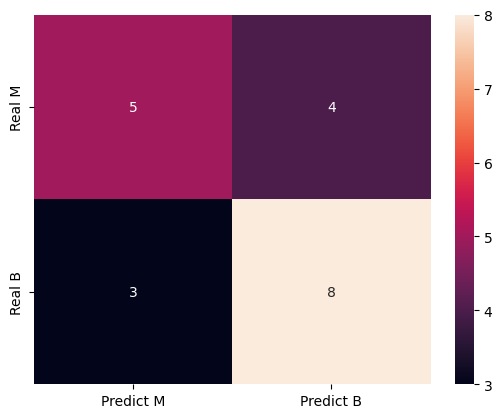

In [178]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_pred, labels=['M', 'B'])
confusion_df = pd.DataFrame(confusion, index=['Real M', 'Real B'], columns=['Predict M', 'Predict B'])

sns.heatmap(confusion_df, annot=True)
plt.show()

In [179]:
k = 50

scores = np.zeros(shape = k)

for n in range(1 , k+1):
    KNN = KNeighborsClassifier(n_neighbors=n, weights='distance')
    scoreN = cross_val_score (KNN , scale , y , cv=None)
    scores[n-1] = np.mean(scoreN)
    
scores


array([0.77, 0.77, 0.84, 0.84, 0.82, 0.86, 0.81, 0.85, 0.82, 0.87, 0.85,
       0.86, 0.85, 0.85, 0.82, 0.85, 0.83, 0.87, 0.86, 0.86, 0.84, 0.85,
       0.86, 0.85, 0.84, 0.87, 0.85, 0.84, 0.84, 0.84, 0.84, 0.85, 0.85,
       0.84, 0.83, 0.82, 0.83, 0.81, 0.82, 0.83, 0.82, 0.83, 0.82, 0.82,
       0.81, 0.81, 0.82, 0.83, 0.82, 0.82])

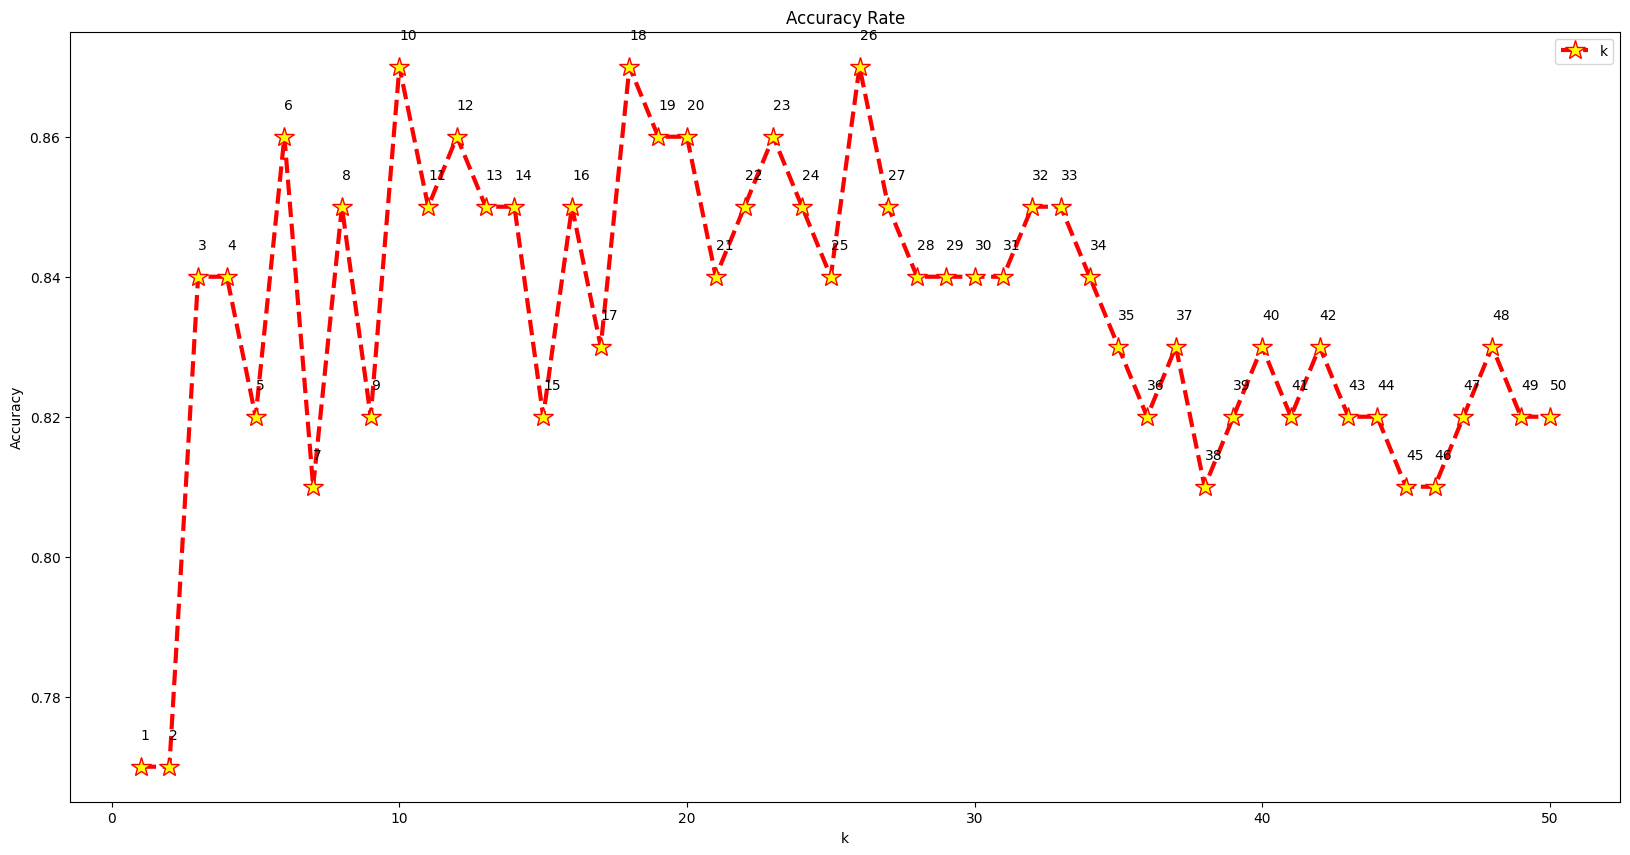

In [180]:
fig , ax = plt.subplots (figsize=(20,10))
ax.plot (range(1,k+1) , scores , color = 'red' , linestyle= 'dashed' , lw=3 , marker='*' ,  markerfacecolor='yellow', markersize=15, label= 'k')

annotations = [f"{n}" for n in range(1, k + 1)]

for xi, yi, text in zip(range(1, k + 1), scores, annotations):
    ax.annotate(text,xy=(xi, yi), xycoords='data', xytext=(0, 20),textcoords='offset points')

plt.title('Accuracy Rate')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [181]:
new_model = KNeighborsClassifier(n_neighbors=26, weights='distance')
new_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=26, weights='distance')

In [182]:
print('Score:', np.around(new_model.score(x_test, y_test)*100, 2), '%')

Score: 80.0 %


In [183]:
from sklearn.model_selection import cross_val_score

cross = np.around(cross_val_score(model, scale, y, cv= None)*100, 2)
print('Average Cross Val Score:', np.around(np.mean(cross), 2), '%')

Average Cross Val Score: 82.0 %


In [184]:
evaluation = metrics.classification_report(y_test,new_model.predict(x_test),labels=['M', 'B'])
print(evaluation)                                           

              precision    recall  f1-score   support

           M       0.73      0.89      0.80         9
           B       0.89      0.73      0.80        11

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



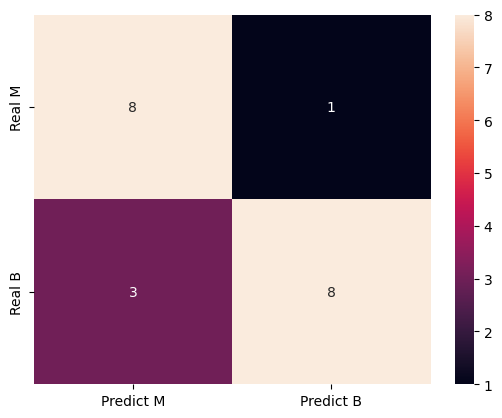

In [185]:
y_pred = new_model.predict(x_test)
confusion = metrics.confusion_matrix(y_test, y_pred, labels=['M', 'B'])
confusion_df = pd.DataFrame(confusion, index=['Real M', 'Real B'], columns=['Predict M', 'Predict B'])

sns.heatmap(confusion_df, annot=True)
plt.show()